## API Examples

### pu4c.det3d.app

##### pu4c.det3d.app.cloud_viewer

In [3]:
import pu4c
# pu4c.det3d.app.cloud_viewer(filepath="/datasets/KITTI/object/training/velodyne/000000.bin", num_features=4)

points, boxes3d, boxes3d_with_label = pu4c.det3d.app.det3d_test_data().get("list3/kitti/000010/points")
# points, boxes3d, boxes3d_with_label = pu4c.det3d.app.det3d_test_data().get("list3/nuscenes/000080/points")
pu4c.det3d.app.cloud_viewer(points=points, boxes3d=boxes3d)
# pu4c.det3d.app.cloud_viewer(points=points, boxes3d=boxes3d_with_label, ds_voxel_size=0.5, rpc=True)
# pu4c.det3d.app.cloud_viewer(points=points, boxes3d=boxes3d_with_label, cloud_uniform_color=[0.99,0.99,0.99])


# points, point_labels = pu4c.det3d.app.det3d_test_data().get("list2/kitti/000010/point_labels")
# pu4c.det3d.app.cloud_viewer(points=points, point_labels=point_labels)

# pu4c.det3d.app.cloud_viewer_panels(points_list=[points, points], boxes3d_list=[boxes3d_with_label, boxes3d_with_label], offset=[180, 0, 0])

##### pu4c.det3d.app.voxel_viewer

In [5]:
import pu4c

voxel_centers, voxel_size, labels, colormap = pu4c.det3d.app.det3d_test_data().get("list4/occ3d-nus/0001/occ")
pu4c.det3d.app.voxel_viewer(voxel_centers, voxel_size, voxel_labels=labels, voxel_colormap=colormap)

# voxel_size, voxel_coords, voxels, voxel_num_points = pu4c.det3d.app.det3d_test_data().get("list4/kitti/000006/voxels_pcdet")
# pu4c.det3d.app.voxel_viewer(voxel_centers=voxel_coords*voxel_size, voxel_size=voxel_size)

##### pu4c.det3d.app.cloud_player

In [7]:
import pu4c

filepaths, boxes3d_list = pu4c.det3d.app.det3d_test_data().get("list2/nuscenes/preds")
pu4c.det3d.app.cloud_player(filepaths=filepaths, num_features=5, boxes3d_list=boxes3d_list)

frame 0


##### pu4c.det3d.app.plot_tsne2d

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


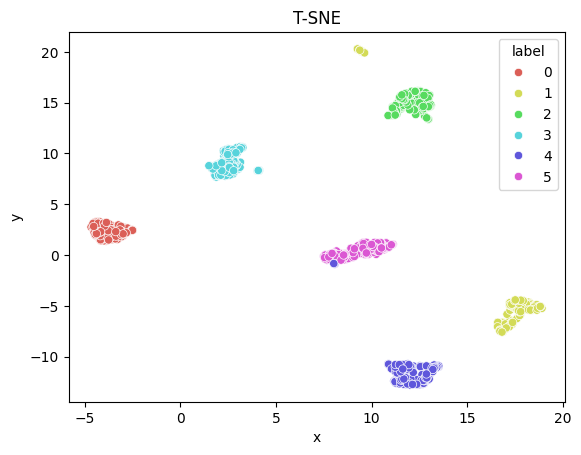

In [1]:
import pu4c
import numpy as np

# from sklearn import datasets
# digits = datasets.load_digits(n_class=6) # MNIST test set 的子集，10 类总样本数 1797, 特征维度 8x8=64
# data, label, (n_samples, n_features) = digits.data, digits.target, digits.data.shape
# pu4c.det3d.app.det3d_test_data().set("list2/sklearn/digits", [data, label])

data, label = pu4c.det3d.app.det3d_test_data().get("list2/sklearn/digits")
# pu4c.det3d.app.plot_tsne2d(data, label)
pu4c.det3d.app.plot_umap(data, label)

### pu4c.det3d.utils

##### pu4c.det3d.utils.image_utils.image_enhancement

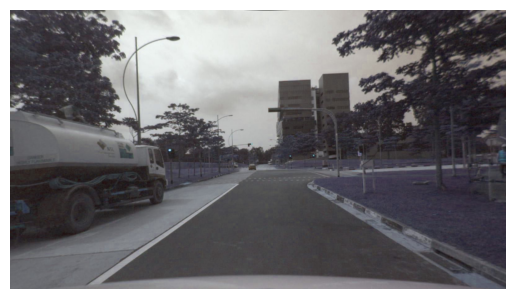

In [1]:
from pu4c.det3d.utils.image_utils import image_enhancement
import matplotlib.pyplot as plt
from matplotlib.image import imread
data = imread("/datasets/nuScenes/Fulldatasetv1.0/samples/CAM_BACK/n015-2018-07-18-11-07-57+0800__CAM_BACK__1531883536437525.jpg")
# data = image_enhancement(data, brightness=100)
# data = image_enhancement(data, contrast=1.5)
# data = image_enhancement(data, saturation=3)
data = image_enhancement(data, hue=180)
plt.axis('off')
plt.imshow(data)

##### pu4c.det3d.utils.plot_color_list

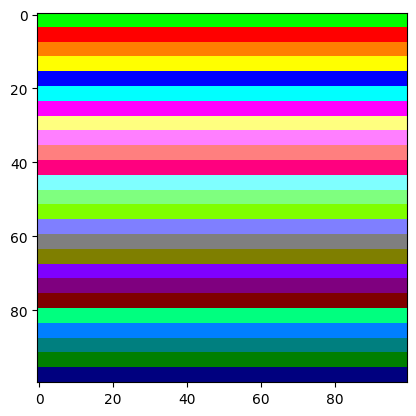

In [1]:
from pu4c.det3d.utils import color_det_class25, plot_color_list
plot_color_list(color_det_class25, strip_height=4)

##### pu4c.det3d.utils.lidar_to_rangeview/rangeview_to_lidar

56.72668 56.72668 True


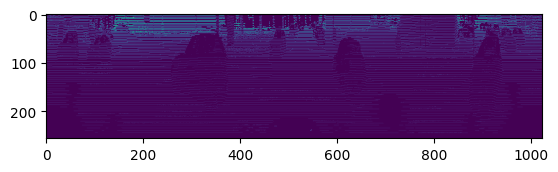

In [1]:
import pu4c
import matplotlib.pyplot as plt
import numpy as np

points, boxes3d, boxes3d_with_label = pu4c.det3d.app.det3d_test_data().get("list3/kitti/000010/points")

fov_up, fov_down, height, width = np.radians(2), np.radians(-24.8), 64, 720 # kitti velodyne params
# range_image, point_idx = pu4c.det3d.utils.range_projection(
#     points[:, :3], height, width, fov=[fov_up, fov_down],
# )
# range_image, point_idx = pu4c.det3d.utils.lidar_to_rangeview(
#     points[:, :3], height, width, fov=[fov_up, fov_down, -np.pi, np.pi], 
# )
resolution, height, width = [np.radians(26.8/256), np.radians(360.0/1024)], 256, 1024 # 垂直/水平视场角宽度 除以 height/width
# resolution, height, width = [np.radians(26.8/64), np.radians(360.0/4096)], 64, 4096
range_image, point_idx, intensity_image = pu4c.det3d.utils.lidar_to_rangeview(
    points[:, :4], height, width, resolution=resolution, fov_offset_down=np.radians(-24.8), return_intensity=True
)

valid_pixels = [[y, x] for y in range(height) for x in range(width) if range_image[y, x] != -1]
y, x = valid_pixels[666]
depth, distance = range_image[y, x], np.linalg.norm(points[point_idx[y, x], :3], ord=2, axis=0)
print(depth, distance, (depth == distance))
plt.imshow(range_image)

In [2]:
# points2 = pu4c.det3d.utils.rangeview_to_lidar(range_image, fov=[fov_up, fov_down, -np.pi, np.pi])
points2 = pu4c.det3d.utils.rangeview_to_lidar(
    range_image, resolution=resolution, fov_offset_down=np.radians(-24.8), intensity_image=intensity_image
)
print(points.shape[0], points2.shape[0])

point_labels = np.concatenate((np.zeros(points.shape[0]), np.ones(points2.shape[0])), axis=0)
points = np.concatenate((points[:, :3], points2[:, :3]), axis=0)
pu4c.det3d.app.cloud_viewer(points=points, point_labels=point_labels, rpc=True)

115875 57574


## Test Data Generation

In [ ]:
# test data
import pu4c
from pu4c.det3d.utils import read_points
from pu4c.common.utils import read_pickle
import numpy as np
import os

# infos = read_pickle("/workspace/files/blob/Det3DTrans/OpenPCDetTrans/data/kitti/kitti_infos_train.pkl")
# info = infos[4]
# points = read_points(filepath=f"/datasets/KITTI/object/training/velodyne/{info['point_cloud']['lidar_idx']}.bin")
# boxes3d = info['annos']['gt_boxes_lidar']

# map_name_to_id = {'Car': 0, 'Pedestrian': 1, 'Cyclist': 2}
# cls_ids = np.array([map_name_to_id[name] for name in info['annos']['name'][:boxes3d.shape[0]]])
# boxes3d_with_label = np.concatenate((boxes3d, cls_ids[:, None]), axis=1)
# # 测试数据键值命名规则: 数据类型/数据来源/数据总体描述
# pu4c.det3d.app.det3d_test_data().set("list3/kitti/000010/points", data=[points, boxes3d, boxes3d_with_label])

# import open3d as o3d
# cloud = o3d.geometry.PointCloud()
# cloud.points = o3d.utility.Vector3dVector(points[:, :3])
# cloud = cloud.voxel_down_sample(0.5)
# points_ds = np.array(cloud.points)
# point_labels = np.concatenate((np.zeros(points.shape[0]), np.ones(points_ds.shape[0])), axis=0)
# points = np.concatenate((points[:, :3], points_ds), axis=0)
# pu4c.det3d.app.det3d_test_data().set("list2/kitti/000010/point_labels", data=[points, point_labels])


# infos = read_pickle("/workspace/codevault/Det3DTrans/OpenPCDetTrans/data/nuscenes/v1.0-trainval/nuscenes_infos_10sweeps_val.pkl")
# info = infos[0]
# points = read_points(filepath=os.path.join("/datasets/nuScenes/Fulldatasetv1.0/", info['lidar_path']), num_features=5)
# boxes3d = info['gt_boxes'][:, :7]

# nuscenes_classes = ['car', 'pedestrian', 'bicycle', 'motorcycle', 'bus', 'truck', 'construction_vehicle', 'trailer', 'barrier', 'traffic_cone', 'ignore']
# map_name_to_id = {'car': 0, 'pedestrian': 1, 'bicycle': 2, 'motorcycle': 2}
# cls_ids = np.array([map_name_to_id[name] if name in map_name_to_id.keys() else 3 for name in info['gt_names'][:boxes3d.shape[0]]])
# boxes3d_with_label = np.concatenate((boxes3d, cls_ids[:, None]), axis=1)
# pu4c.det3d.app.det3d_test_data().set("list3/nuscenes/000080/points", data=[points, boxes3d, boxes3d_with_label])



remove list2/nuscenes/000080/points, data at /tmp/pu4c/det3d_test_data.pkl


In [ ]:
"""
occ3d-nus/labels.npz
    semantics: (grid_size_x=80/0.4=200, grid_size_y=80/0.4=200, grid_size_z=6.4/0.4=16), 每个体素的语义标签
    mask_lidar: grid_size_shape, 激光雷达视角下的掩膜，反射激光束的体素为激光点语义标签，激光束穿过的体素为空，其他体素为未知，掩膜标记未知体素为 0
    mask_camera: grid_size_shape, 同理相机视角下的掩膜
"""
import pu4c
import numpy as np
nus_colormap = np.array(
    [
        [0,   0,   0, 255],  # 0 undefined
        [255, 158, 0, 255],  # 1 car  orange
        [0, 0, 230, 255],    # 2 pedestrian  Blue
        [47, 79, 79, 255],   # 3 sign  Darkslategrey
        [220, 20, 60, 255],  # 4 CYCLIST  Crimson
        [255, 69, 0, 255],   # 5 traiffic_light  Orangered
        [255, 140, 0, 255],  # 6 pole  Darkorange
        [233, 150, 70, 255], # 7 construction_cone  Darksalmon
        [255, 61, 99, 255],  # 8 bycycle  Red
        [112, 128, 144, 255],# 9 motorcycle  Slategrey
        [222, 184, 135, 255],# 10 building Burlywood
        [0, 175, 0, 255],    # 11 vegetation  Green
        [165, 42, 42, 255],  # 12 trunk  nuTonomy green
        [0, 207, 191, 255],  # 13 curb, road, lane_marker, other_ground
        [75, 0, 75, 255],    # 14 walkable, sidewalk
        [128, 100, 100, 255], # 随便自定义的
        [128, 100, 100, 255], # 随便自定义的
        [255, 0, 0, 255],     # 17 unobsrvd
        [128, 128, 128, 255], # 18 for vis
], dtype=np.float32)
FREE_LABEL = 17 # 空体素类别
voxel_size = [0.4, 0.4, 0.4]
point_cloud_range = [-40, -40, -1, 40, 40, 5.4]
filepath = "/datasets/nuScenes/Occpancy3D-nuScenes/gts/scene-0001/1e19d0a5189b46f4b62aa47508f2983e/labels.npz"
data = np.load(filepath)
voxel_label, lidar_mask, camera_mask = data['semantics'], data['mask_lidar'], data['mask_camera']

# 获取稀疏体素中心点
valid_mask = voxel_label != FREE_LABEL # 非空体素掩膜
# grid_size_shape -> ((N=非空体素个数,), (N,), (N,)) 非空体素下标，即 valid_mask[valid_idx[0][i], valid_idx[1][i], valid_idx[2][i]] == True
valid_idx = np.where(valid_mask)
labels = voxel_label[valid_idx] # (N,) 非空体素的标签
voxel_centers = np.array(valid_idx).T * voxel_size # (3, N)->(N, 3) 稀疏体素下标乘以 voxel_size 得到稀疏体素中心点

colormap = nus_colormap[:, :3] / 255
pu4c.det3d.app.det3d_test_data().set("list4/occ3d-nus/0001/occ", data=[voxel_centers, voxel_size, labels, colormap])